In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
import math
from math import log

In [4]:
def create_data():
    '''
        xxx
    '''
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ]
    labels = [u'年龄', u'有工作', u'有自己的房子', u'信贷情况', u'类别']
    # 返回数据集和每个维度的名称
    return datasets, labels


Object `labels` not found.


In [17]:
datasets, labels = create_data()

In [18]:
train_data = pd.DataFrame(datasets, columns=labels)

In [19]:
train_data

,年龄,有工作,有自己的房子,信贷情况,类别
0,青年,否,否,一般,否
1,青年,否,否,好,否
2,青年,是,否,好,是
3,青年,是,是,一般,是
4,青年,否,否,一般,否
5,中年,否,否,一般,否
6,中年,否,否,好,否
7,中年,是,是,好,是
8,中年,否,是,非常好,是
9,中年,否,是,非常好,是


In [30]:
def calc_ent(datasets):
    data_length = len(datasets)
    label_count = {}
    for i in range(data_length):
        label = datasets[i][-1]
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1
    ent = -sum([(p / data_length) * log(p / data_length, 2)
                for p in label_count.values()])
    return ent

In [31]:
datasets

[['青年', '否', '否', '一般', '否'],
 ['青年', '否', '否', '好', '否'],
 ['青年', '是', '否', '好', '是'],
 ['青年', '是', '是', '一般', '是'],
 ['青年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '一般', '否'],
 ['中年', '否', '否', '好', '否'],
 ['中年', '是', '是', '好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['中年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '非常好', '是'],
 ['老年', '否', '是', '好', '是'],
 ['老年', '是', '否', '好', '是'],
 ['老年', '是', '否', '非常好', '是'],
 ['老年', '否', '否', '一般', '否']]

In [417]:
# 经验条件熵
def cond_ent(datasets, axis=0):
    data_length = len(datasets)
    feature_sets = {}
    for i in range(data_length):
        feature = datasets[i][axis] # 特征的index
        if feature not in feature_sets:
            feature_sets[feature] = []
            # featrue:][样本1,['老年', '是', '否', '非常好', '是'],[]]
        feature_sets[feature].append(datasets[i])
    cond_ent = sum([(len(p) / data_length) * calc_ent(p) for p in feature_sets.values()])
    return cond_ent

In [315]:
# 信息增益
def info_gain(ent, cond_ent):
    return ent - cond_ent

In [336]:
'''
计算某个具体取值的IV(a)子值用于求和
DataSet:传输数据集
axis:特征维度索引
value:具体特征值
'''
def sub_Dv(DataSet,axis,value):
    retData_Dv=[]#存储特征值，具体取值的样本个数
    sum_count=len(DataSet)#总样本数
    for featVec in DataSet:
          if featVec[axis]==value:
             retData_Dv.append(featVec)
    sub_Dv_count=len(retData_Dv)
    iv_ratio=sub_Dv_count/sum_count
    iv=iv_ratio * log(iv_ratio)
    return iv
    #return retData_Dv

In [337]:
X=sub_Dv(datasets,0,'青年')
print(X)


-0.3662040962227032


In [390]:
# 信息增益率中惩罚系数计算
'''
IV(a)计算某个特征值的 惩罚系数倒数
DataSet:传递的数据集合
axis:特征位置
'''
def IV_Cal(DataSet,axis):
     featureList=[example[axis] for example in DataSet]
     uniqueVals = set(featureList)#设置每一特征集合(去重)
     ratio_v = 0.0#初始化特征的基尼系数Gini
     for value in uniqueVals:
           ratio_temp=sub_Dv(DataSet,axis,value)
           ratio_v=ratio_v + ratio_temp
     return (-1)*ratio_v

In [418]:
Y=IV_Cal(datasets,1)
print(Y)

0.6365141682948128


In [415]:
# 信息增益率计算
'''
IV(a)计算某个特征值的惩罚系数
DataSet:传递的数据集合
axis:特征位置
'''
def Gain_ratio_D(DataSet,axis):
    #测试信息增益
    ent_value=calc_ent(DataSet)#引用老师的代码
    cond_ent_value=cond_ent(DataSet,axis)#引用老师的代码
    Gain_D=info_gain(ent_value,cond_ent_value)#计算信息增益
    rtn_Gain_ratio=Gain_D * (1 / IV_Cal(DataSet,axis))#计算信息增益率
    return rtn_Gain_ratio

In [425]:
#测试信息增益率
Gain_ration_0=Gain_ratio_D(datasets,3)
print(Gain_ration_0)

1
2
1
2
3
4
5
3
4
5
6
7
8
9
6
1
1
2
3
4
1
1
2
2
3
4
1
2
3
4
0.3344944447439628


In [401]:
#axis=0
#value='青年'
#label='是'
#以下是所选特征的基尼系数计算
'''
功能：每个子集的Gini系数计算
参数：计算每个特征值子集的基尼系数
'''
def gini_sub(DataSetY,DataSetN):
    y_count=len(DataSetY)#取能放贷的标签数量
    n_count=len(DataSetN)#取不能放贷的标签数量
    sum_count=y_count + n_count#特征值总数量
    retResult = 1.0 - pow(y_count/sum_count,2) - pow(n_count/sum_count,2)
    return retResult

In [396]:
'''
DataSet:传递结果集 axis数据集特征位置 value:特征值 label：标签/验证结果/预测结果
'''
def gini_sub_calc(DataSet,axis,value,label):
    retData_Y=[]#是的集合
    retData_N=[]#否的集合
    sum_count=len(DataSet)#总样本数
    for featVec in datasets:
          if featVec[axis]==value:
                if featVec[-1]!=label:#否
                    retData_N.append(featVec)
                if featVec[-1]==label:#是
                    retData_Y.append(featVec)
   # print(retData_Y)
   # print(retData_N)
    gini_sub_val = gini_sub(retData_Y,retData_N)#某特征子集基尼系数
    sum_split_count=len(retData_Y) + len(retData_N)#某特征的子样本数量
    gini_sub_val_total=(float)(sum_split_count / sum_count) * gini_sub_val
    #某特征子集的合计基尼系数
    return gini_sub_val_total
#return retData_Y, retData_N

In [397]:
#测试gini子项
gini_val=gini_sub_calc(datasets,0,'青年','是')
print(gini_val)

0.15999999999999998


In [398]:
'''
基尼系数gini计算
返回每个特征的基尼系数
'''
def GiniCal(DataSet):
    numcount = len(DataSet[0]) - 1#样本列数 - 最后一个label列
    gini_val=[]#存放每个特征的gini值
    for i in range(numcount):#取出数据集中每一列
        featList = [example[i] for example in DataSet]#取出特征值
        uniqueVals = set(featList)#设置每一特征集合(去重)
        print(uniqueVals)
        gini = 0.0#初始化特征的基尼系数Gini
        for value in uniqueVals:
           gini_temp=gini_sub_calc(DataSet,i,value,'是')#传入标签值是或否，都一样
           gini=gini + gini_temp
        gini_val.append(gini)
    return gini_val

In [400]:
#gini系数计算整个数据集的gini系数
gini_vals=GiniCal(datasets)
print(gini_vals)

{'青年', '老年', '中年'}
{'是', '否'}
{'是', '否'}
{'一般', '好', '非常好'}
[0.4266666666666666, 0.31999999999999995, 0.26666666666666666, 0.2844444444444444]


In [112]:
    numcount = len(datasets[0]) - 1#样本特征数量，最后一个是标签
    for i in range(numcount):#取出数据集中每一行
        featList = [example[i] for example in datasets]#取出特征值
        uniqueVals = set(featList)#设置每一特征集合(去重)
        #根据每一特征值划分进行Gini计算
        print(uniqueVals)
        for 
        
    data_length = len(datasets)
    label_count = {}
    for i in range(data_length):
        label = datasets[i][-1]
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1
print(label_count)

{'青年', '老年', '中年'}
{'是', '否'}
{'是', '否'}
{'一般', '好', '非常好'}
{'否': 6, '是': 9}


In [79]:
def info_gain_train(datasets):
    count = len(datasets[0]) - 1
    ent = calc_ent(datasets)
    best_feature = []
    for c in range(count):
        c_info_gain = info_gain(ent, cond_ent(datasets, axis=c))
        best_feature.append((c, c_info_gain))
        #[[年龄，a],[有房子，b]]
        print('特征({}) - info_gain - {:.3f}'.format(labels[c], c_info_gain))
    best_ = max(best_feature, key=lambda x: x[-1])
    return '特征({})的信息增益最大，选择为根节点特征'.format(labels[best_[0]])

In [54]:
info_gain_train(np.array(datasets))

特征(年龄) - info_gain - 0.083
特征(有工作) - info_gain - 0.324
特征(有自己的房子) - info_gain - 0.420
特征(信贷情况) - info_gain - 0.363


'特征(有自己的房子)的信息增益最大，选择为根节点特征'

In [31]:
class Node:
    def __init__(self, root=True, label=None, feature_name=None, feature=None):
        '''
            1.叶子节点：label
            2.中间节点：条件（特征）[条件1]子节点；[条件2]子节点
            是否为叶子节点
        '''
        self.root = root # 是否为叶子节点
        self.label = label # 叶子节点所有样本的标签
        self.feature_name = feature_name # 切分条件
        self.feature = feature # 切分条件
        self.tree = {} # [条件1]子节点 node_son
        self.result = {
            'label:': self.label,
            'feature': self.feature,
            'tree': self.tree
        }

    def __repr__(self):
        return '{}'.format(self.result)

    def add_node(self, val, node):
        '''训练过程使用'''
        self.tree[val] = node

    def predict(self, features):
        '''
            features->预测数据的特征
            预测过程
        '''
        if self.root is True:
            return self.label
        return self.tree[features[self.feature]].predict(features)

# 树的根节点 Node

class DTree:
    '''
        建树过程
    '''
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon # 超参数
        self._tree = {}

    # 熵
    @staticmethod
    def calc_ent(datasets):
        data_length = len(datasets)
        label_count = {}
        for i in range(data_length):
            label = datasets[i][-1]
            if label not in label_count:
                label_count[label] = 0
            label_count[label] += 1
        ent = -sum([(p / data_length) * log(p / data_length, 2)
                    for p in label_count.values()])
        return ent

    # 经验条件熵
    def cond_ent(self, datasets, axis=0):
        data_length = len(datasets)
        feature_sets = {}
        for i in range(data_length):
            feature = datasets[i][axis]
            if feature not in feature_sets:
                feature_sets[feature] = []
            feature_sets[feature].append(datasets[i])
        cond_ent = sum([(len(p) / data_length) * self.calc_ent(p)
                        for p in feature_sets.values()])
        return cond_ent

    # 信息增益
    @staticmethod
    def info_gain(ent, cond_ent):
        return ent - cond_ent

    def info_gain_train(self, datasets):
        count = len(datasets[0]) - 1
        ent = self.calc_ent(datasets)
        best_feature = []
        # 遍历特征
        for c in range(count):
            c_info_gain = self.info_gain(ent, self.cond_ent(datasets, axis=c))
            best_feature.append((c, c_info_gain))
        # 比较大小
        best_ = max(best_feature, key=lambda x: x[-1])
        return best_

    def train(self, train_data):
        """
        input:数据集D(DataFrame格式)，特征集A，阈值epc
        output:决策树T
        """
        """
            不断返回子树node，上级调用可以直接将子树node填在自己的.tree的dict里
            递归过程结束：返回叶子节点
            每次递归调用的train_data，都是上一级tree的节点下发下来的子数据集
        """
        _, y_train, features = train_data.iloc[:, :
                                               -1], train_data.iloc[:,
                                                                    -1], train_data.columns[:
                                                                                            -1]
        # 1,若D中实例属于同一类Ck，则T为单节点树，并将类Ck作为结点的类标记，返回T
        if len(y_train.value_counts()) == 1:
            return Node(root=True, label=y_train.iloc[0])

        # 2, 若A为空，则T为单节点树，将D中实例树最大的类Ck作为该节点的类标记，返回T
        if len(features) == 0:
            return Node(
                root=True,
                label=y_train.value_counts().sort_values(
                    ascending=False).index[0])

        # 3,计算最大信息增益 同5.1,Ag为信息增益最大的特征
        max_feature, max_info_gain = self.info_gain_train(np.array(train_data))
        max_feature_name = features[max_feature]

        # 4,Ag的信息增益小于阈值eta,则置T为单节点树，并将D中是实例数最大的类Ck作为该节点的类标记，返回T
        if max_info_gain < self.epsilon:
            return Node(
                root=True,
                label=y_train.value_counts().sort_values(
                    ascending=False).index[0])

        # 5,构建Ag子集
        node_tree = Node(
            root=False, feature_name=max_feature_name, feature=max_feature)

        feature_list = train_data[max_feature_name].value_counts().index
        for f in feature_list:
            sub_train_df = train_data.loc[train_data[max_feature_name] ==
                                          f].drop([max_feature_name], axis=1)

            # 6, 递归生成树
            sub_tree = self.train(sub_train_df)
            node_tree.add_node(f, sub_tree)

        return node_tree

    def fit(self, train_data):
        self._tree = self.train(train_data)
        return self._tree

    def predict(self, X_test):
        return self._tree.predict(X_test)

In [63]:
datasets, labels = create_data()
data_df = pd.DataFrame(datasets, columns=labels)
dt = DTree()
tree = dt.fit(data_df)

In [64]:
tree

{'label:': None, 'feature': 2, 'tree': {'否': {'label:': None, 'feature': 1, 'tree': {'否': {'label:': '否', 'feature': None, 'tree': {}}, '是': {'label:': '是', 'feature': None, 'tree': {}}}}, '是': {'label:': '是', 'feature': None, 'tree': {}}}}

In [34]:
dt.predict(['老年', '否', '否', '一般'])

'否'

## sklearn

In [35]:
# data
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    # print(data)
    return data[:, :2], data[:, -1]


X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [37]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train,)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
clf.score(X_test, y_test)

0.9666666666666667

In [39]:
tree_pic = export_graphviz(clf, out_file="mytree.pdf")
with open('mytree.pdf') as f:
    dot_graph = f.read()

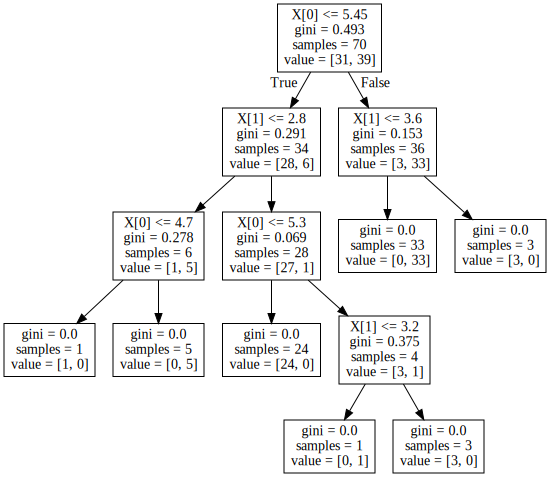

In [40]:
graphviz.Source(dot_graph)